# More Linear Regression!

### Encoding Categorical Variables, Incorporating Interaction and Polynomial Terms, Et Cetera


Today's focus is all about translating raw **data** into useful **information** that a model can understand and properly use. 

## But First - A Recap

In [2]:
# Imports
import pandas as pd
import numpy as np
# Setting random seed for reproducibility
np.random.seed(1000)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

New dataset for today! Insurance costs

My source: https://www.kaggle.com/mirichoi0218/insurance (they got the idea for cleaning up the original open source data from [Machine Learning with R](https://www.packtpub.com/product/machine-learning-with-r-third-edition/9781788295864))

In [ ]:
# read in the data


In [ ]:
# explore the data


In [ ]:
# visualize relationships between numeric columns


In [ ]:
# visualize correlations between numeric columns


In [ ]:
# set our X and y
# ignore our categorical columns for now


In [ ]:
# train test split


In [ ]:
# scale our data

# train on train data

# transform both train and test data


In [ ]:
# now, let's model!


In [ ]:
# grab predictions for train and test set


In [ ]:
# evaluate


In [ ]:
# visualizing our residuals
# https://www.scikit-yb.org/en/latest/api/regressor/residuals.html
from yellowbrick.regressor import ResidualsPlot




Ideas to continue improving this model?

- 


## Encoding Categorical Variables

How do we bring in those categorical columns? By **encoding** them - translating the string variables into useful numbers the model can hopefully understand and take meaning from.

### Most Common Encoding Method: One Hot Encoding (OHE)

Turns categorical columns into binaries, where each option is turned into its own column.

For our data: we have a column called `region`:

In [ ]:
# explore our region column

With OHE, the result will either be three or four new columns: `is_southeast`, `is_northwest`, `is_southwest`, `is_northeast`

For the head of this data:

| `is_southeast` | `is_northwest` | `is_southwest` | `is_northeast` |
| -------------- | -------------- | -------------- | -------------- | 
| 0 | 0 | 1 | 0 |
| 1 | 0 | 0 | 0 |
| 1 | 0 | 0 | 0 |
| 0 | 1 | 0 | 0 |
| 0 | 1 | 0 | 0 |

Why could it be three? We often drop the first column, and allow the model to capture that value by having zeros in all other columns.

#### With Pandas' `get_dummies()`

In [ ]:
cat_cols = None

In [ ]:
x_cols = None

In [ ]:
# one hot encode variables
df_ohe = None

print(df_ohe.shape)
df_ohe.head()

#### With `sklearn`'s One Hot Encoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder

from sklearn.compose import ColumnTransformer

In [ ]:
# create an encoder object. This will help us to convert
# categorical variables to new columns
encoder = None

# Create an columntransformer object.
# This will help us to merge transformed columns
# with the rest of the dataset.

ct = None

In [ ]:
type(X)

In [ ]:
# can display as a dataframe like so
pd.DataFrame(X, columns= ct.get_feature_names()).head()

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [ ]:
# scale our data
scaler = StandardScaler()

# train on train data
scaler.fit(X_train)

# transform both train and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# now, let's model!
lr = LinearRegression()

lr.fit(X_train_scaled, y_train)

# grab predictions for train and test set
train_preds = lr.predict(X_train_scaled)
test_preds = lr.predict(X_test_scaled)

In [ ]:
# evaluate
print(f"Train R2 Score: {r2_score(y_train, train_preds):.3f}")
print(f"Test R2 Score: {r2_score(y_test, test_preds):.3f}")

In [ ]:
# visualizing our residuals
visualizer = ResidualsPlot(lr)

visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show()  
plt.show()

#### Some Pros and Cons of OHE:

Pros:

- Simple to understand
- Easy to implement

Cons:

- If the categorical column has many options, or there are a lot of categorical columns, you can add _a lot_ more columns - **curse of dimensionality**
- Resulting columns are very sparse (mostly zeros)
- Resulting columns are directly related (multicollinear)

### Other Encoding Methods?

Certainly there are other ways to turn a categorical column into numeric data that a model can understand.

Some Examples:

- [Label/Ordinal Encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html)
- [Frequency Encoding](https://contrib.scikit-learn.org/category_encoders/count.html) (just a count encoder with `normalize=True` to turn into a frequency percentage)
- [Target Encoding](https://contrib.scikit-learn.org/category_encoders/targetencoder.html) (or, relatedly, [Leave-One-Out Encoding](https://contrib.scikit-learn.org/category_encoders/leaveoneout.html) or [Weight of Evidence Encoding](https://contrib.scikit-learn.org/category_encoders/woe.html))

Useful links:

- [Category Encoders](https://contrib.scikit-learn.org/category_encoders/index.html) - library of sklearn-style encoders that implement more encoding methods than those actually packaged in Sklearn
- [Sklearn's Preprocessing Section](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing) - user guide section on preprocessing (includes scalers and transformers as well as encoders)

## Polynomial Terms - Simple Linear Regression

Demonstrating this on a toy example, with a single x variable predicting y.

In [3]:
# 150 samples from uniform distribution between -2pi and 2pi

x = np.random.uniform(-2*np.pi, 2*np.pi, 150)

# Creating target (y) - so we know the true relationship between x and y
# But - adding some noise (error) with 'np.random'

y = np.sin(x) + np.random.normal(loc=0, scale=0.4, size=len(x))

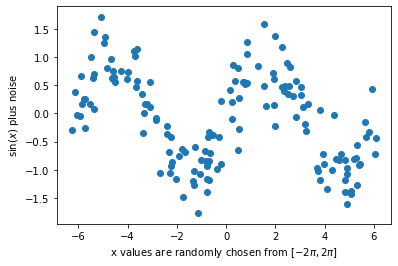

In [4]:
# Visualize it
plt.scatter(x, y)

plt.ylabel('$\sin(x)$ plus noise')
plt.xlabel('x values are randomly chosen from $[-2\pi, 2\pi]$')
plt.show()

In [5]:
# Fitting a linear model
lr = LinearRegression()
lr.fit(x.reshape(-1, 1), y)

LinearRegression()

In [6]:
# Grabbing the predicted values
y_pred = lr.predict(x.reshape(-1, 1))

In [7]:
# Scoring our model
print(f"R2 Score: {r2_score(y, y_pred)}")

R2 Score: 0.13519811764759415


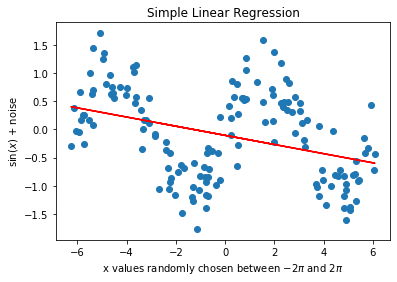

In [8]:
# Visualize it
plt.scatter(x, y) # original data

plt.plot(x, y_pred, c='red') # predicted values

plt.ylabel('$\sin(x)$ + noise')
plt.xlabel('x values randomly chosen between $-2\pi$ and $2\pi$')
plt.title("Simple Linear Regression")

plt.show()

Is this a good model? Well - of course not. It's definitely **underfit** - it is not complex enough to accurately capture the pattern and predict the target.

Let's try again, but now with polynomials!

In [ ]:
# For this, we'll need some helper functions
# Shoutout to Andy for sending me these

def create_poly_dataset(x, degree):
    """
    returning dataset with the given polynomial degree
    """
    # Instantiate the PolynomialFeatures object with given 'degree'
    poly = PolynomialFeatures(degree=degree)

    # Now transform data to create higher order features
    new_data = poly.fit_transform(x.reshape(-1, 1))
    return new_data

def fit_linear_model(data, y):
    """
    fitting a linear model and printing model details
    """
    np.set_printoptions(precision=4, suppress=True)

    if data.ndim == 1:
        data = data.reshape(-1, 1)

    lr = LinearRegression(fit_intercept=False)
    lr.fit(data, y)
    print("-"*13)
    print("Coefficients: ", lr.coef_)
    y_pred = lr.predict(data)
    print(f"R-Squared: {lr.score(data, y):.3f}")
    return lr

def plot_predict(x, y, model):
    """
    plotting predictions against true values
    """
    plt.scatter(x, y, label='true')
    x_pred = np.linspace(x.min(), x.max(), 100)
    
    # visualize beyond this x range by uncommenting below:
#     extra = x.ptp() * .2
#     x_pred = np.linspace(x.min() - extra, x.max() + extra, 100)

    plt.plot(x_pred, model.predict(create_poly_dataset(x_pred, len(model.coef_)-1)),
             label='predicted', c='red')

    if len(model.coef_) == 1:
        plt.title(f"{len(model.coef_) - 1} Polynomial Terms \n (no slope)")
    elif (len(model.coef_) - 1) == 1:
        plt.title(f"{len(model.coef_) - 1} Polynomial Term")
    else:
        plt.title(f"{len(model.coef_) - 1} Polynomial Terms")

    plt.legend()
    plt.show()
    return

In [ ]:
# visualizing an assortment of polynomial degrees
# can visualize each sequential polynomial with `range(n)`
for i in [0, 1, 2, 3, 5, 7, 9, 13, 18]:
    xi = create_poly_dataset(x, i)
    plot_predict(x, y, fit_linear_model(xi, y))

Evaluate: which of these is the best?

- 


Evaluate: so what?

- 


## Interaction Terms

When do we need interaction terms? And how do we check for them?

Well, first things first - what interactions do _you_ think would make sense? That's the easiest way to incorporate interaction terms - use domain knowledge to think through what usefully could be combined into an interaction.

As for how to check if something might be better captured as an interaction...

In [ ]:
# add the target back onto our OHE df
df_ohe['target'] = df['charges']

In [ ]:
# an example of no interaction term...
sns.lmplot(x='age', y='target', hue='smoker_yes', data=df_ohe, scatter=False)
plt.show()

How do I know these two variables, `age` and `smoker_yes`, aren't interacting? 

- Look at the slopes - parallel


In [ ]:
# now let's look at something else...
sns.lmplot(x='bmi', y='target', hue='smoker_yes', data=df_ohe, scatter=False)
plt.show()

What do you think?

- 


## Implementing Interaction and Polynomials in Sklearn

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
X = df_ohe.drop(columns = 'target')
y = df_ohe['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

Let's first do Polynomials, to the 3rd degree:

In [ ]:
poly = PolynomialFeatures(degree=3, interaction_only=False)

In [ ]:
poly.fit(X_train)

In [ ]:
X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)

In [ ]:
X_train_poly = pd.DataFrame(X_train_poly, columns = poly.get_feature_names())
X_train_poly.head()

In [ ]:
X_train_poly.columns

In [ ]:
X_train_poly.info()

In [ ]:
# Still need to scale
scaler = StandardScaler()

scaler.fit(X_train_poly)

X_train_poly_sc = scaler.transform(X_train_poly)
X_test_poly_sc = scaler.transform(X_test_poly)

In [ ]:
lr = LinearRegression()

lr.fit(X_train_poly_sc, y_train)

X_train_poly_preds = lr.predict(X_train_poly_sc)
X_test_poly_preds = lr.predict(X_test_poly_sc)

In [ ]:
# evaluate
print(f"Train R2 Score: {r2_score(y_train, X_train_poly_preds):.3f}")
print(f"Test R2 Score: {r2_score(y_test, X_test_poly_preds):.3f}")

----

In [ ]:
interactions = PolynomialFeatures(degree=2, interaction_only=True)

interactions.fit(X_train)

In [ ]:
X_train_ints = interactions.transform(X_train)
X_test_ints = interactions.transform(X_test)

In [ ]:
X_train_ints = pd.DataFrame(X_train_ints, columns = interactions.get_feature_names())
X_train_ints.head()

In [ ]:
# Still need to scale
scaler = StandardScaler()

scaler.fit(X_train_ints)

X_train_ints_sc = scaler.transform(X_train_ints)
X_test_ints_sc = scaler.transform(X_test_ints)

In [ ]:
lr = LinearRegression()

lr.fit(X_train_ints_sc, y_train)

X_train_ints_preds = lr.predict(X_train_ints_sc)
X_test_ints_preds = lr.predict(X_test_ints_sc)

In [ ]:
# evaluate
print(f"Train R2 Score: {r2_score(y_train, X_train_ints_preds):.3f}")
print(f"Test R2 Score: {r2_score(y_test, X_test_ints_preds):.3f}")

Evaluate: What do you think? Is this blanket way of approaching polynomial or interaction terms useful?

- 


## Feature Selection and Feature Importances...

Not much time to do this, but:

- Lasso Regression (L1 regularization)
- Recursive Feature Elimination
- Forward Stepwise Selection

Can always check out the python library [`eli5`](https://eli5.readthedocs.io/en/latest/index.html) (yes, Explain Like I'm 5)

## Resources:

[Feature Engineering and Selection: A Practical Approach for Predictive Models](https://bookdown.org/max/FES/) (computing done in R, but book focuses mostly on discussing the hows and whys rather than focusing on implementation)

- Their chapter on [Encoding Categorical Predictors](https://bookdown.org/max/FES/encoding-categorical-predictors.html)
- And their chapter on [Detecting Interaction Effects](https://bookdown.org/max/FES/detecting-interaction-effects.html)